In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# load data
df = pd.read_csv("Online_Retail.csv")

In [3]:
# visualize data 
df.describe(include = "all")

,TransactionNo,MerchandiseCode,Quan,TransactionDate,ItemPrice,UserID
count,541909,541909,541909.000000,541909,541909.000000,4.068290e+05
unique,25899,4070,NaN,286,NaN,NaN
top,573585,85123A,NaN,2020-9-1,NaN,NaN
freq,1114,2313,NaN,9317,NaN,NaN
mean,NaN,NaN,9.551611,NaN,4.611127,1.920313e+04
std,NaN,NaN,218.080464,NaN,96.759853,9.303983e+04
min,NaN,NaN,-80995.000000,NaN,-11062.060000,1.234600e+04
25%,NaN,NaN,1.000000,NaN,1.250000,1.396900e+04
50%,NaN,NaN,3.000000,NaN,2.080000,1.515900e+04
75%,NaN,NaN,10.000000,NaN,4.130000,1.680600e+04


In [4]:
# delete samples with null values 
df_cleaned = df.dropna(axis=0, subset=["UserID"])

In [5]:
# transofrming datetime
df_cleaned.loc[:, "TransactionDate"] = pd.to_datetime(df_cleaned.loc[:,"TransactionDate"])

/home/xufeng/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [6]:
# add the 'total consumption' into data
df_cleaned.loc[:, "Total Consumption"] = df_cleaned["Quan"] * df_cleaned["ItemPrice"]

/home/xufeng/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [7]:
# view data after clearing 
df_cleaned.head(10)

,TransactionNo,MerchandiseCode,Quan,TransactionDate,ItemPrice,UserID,Total Consumption
0,29138841,85123A,8,2020-09-01,2.76,208163.0,22.08
1,29138841,71053,8,2020-09-01,2.12,208163.0,16.96
2,29138841,84406B,8,2020-09-01,5.12,208163.0,40.96
3,29138841,84029G,8,2020-09-01,4.33,208163.0,34.64
4,29138841,84029E,8,2020-09-01,3.39,208163.0,27.12
5,29138841,22752,2,2020-09-01,7.65,208163.0,15.30
6,29138841,21730,6,2020-09-01,4.25,208163.0,25.50
7,29326612,22633,5,2020-09-01,1.85,208163.0,9.25
8,29326612,22632,1,2020-09-01,5.12,208163.0,5.12
9,291388311,84879,32,2020-09-01,1.69,212862.0,54.08


In [8]:
# rfm analysis
now = dt.datetime(2022,2,12)
rfm_model = df_cleaned.groupby("UserID").agg({"TransactionNo": lambda num: len(num),
                                             "TransactionDate": lambda date: (now - date.max()).days,
                                             "Total Consumption": lambda tc: tc.sum()})

In [9]:
# change the names of rfm model
rfm_model.columns = ["Recency", "Frequency", "Monetary"]

In [30]:
# categorizing rfm model
rfm_model["R_Score"] = pd.qcut(rfm_model["Recency"], 4, [1,2,3,4])
rfm_model["F_Score"] = pd.qcut(rfm_model["Frequency"], 4, [1,2,3,4])
rfm_model["M_Score"] = pd.qcut(rfm_model["Monetary"], 4, [1,2,3,4])

In [31]:
# add total rfm score 
rfm_model["RFM_Score"] = rfm_model["R_Score"].astype(int) + rfm_model["M_Score"].astype(int) + rfm_model["F_Score"].astype(int)

In [32]:
# view the rfm model
rfm_model.head(10)

,Recency,Frequency,Monetary,User_Type,R_Score,F_Score,M_Score,RFM_Score
UserID,,,,,,,,
12346.0,2,756,0.00,0,1,4,1,6
12347.0,182,432,4310.00,1,4,1,4,9
12348.0,31,505,1797.24,1,2,3,4,9
12349.0,73,448,1757.55,1,3,1,4,8
12350.0,17,741,334.40,0,1,4,2,7
12352.0,95,466,1545.41,1,3,2,3,8
12353.0,4,634,89.00,0,1,4,1,6
12354.0,58,662,1079.40,0,3,4,3,10
12355.0,13,644,459.40,0,1,4,2,7


In [13]:
X = rfm_model.iloc[:, 0:3]
X

,Recency,Frequency,Monetary
UserID,,,
12346.0,2,756,0.00
12347.0,182,432,4310.00
12348.0,31,505,1797.24
12349.0,73,448,1757.55
12350.0,17,741,334.40
...,...,...,...
228661.0,251,432,6880.06
1725421.0,274,430,3905.59
1725481.0,28,488,345.66


In [14]:
# standardlize data
scaler = StandardScaler()
scaler.fit(X)
rfm_scaled = scaler.transform(X)

In [15]:
# placing scaled array into dataframe
df_standard = pd.DataFrame(data=rfm_scaled, columns=["R", "F", "M"])
df_standard

,R,F,M
0,-0.391720,2.888902,-0.231014
1,0.382657,-0.939945,0.293469
2,-0.266959,-0.077273,-0.012308
3,-0.086271,-0.750866,-0.017138
4,-0.327188,2.711640,-0.190320
...,...,...,...
4367,0.679501,-0.939945,0.606219
4368,0.778449,-0.963580,0.244257
4369,-0.279865,-0.278169,-0.188950
4370,0.804262,-0.963580,1.024097


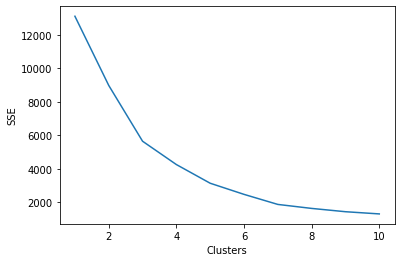

In [16]:
# check number of clusters from 1 to 10 against sum of squared residuals
sse = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(df_standard)
    sse.append(k_means.inertia_)
    
plt.plot(np.arange(1,11),sse)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [26]:
# establish k means model with optimum number of clusters
k_means_op = KMeans(n_clusters=5)
k_means_op.fit(df_standard)
result = k_means_op.predict(df_standard)
result

array([0, 1, 1, ..., 1, 3, 1], dtype=int32)

In [27]:
# add prediected user type into table
rfm_model["User_Type"] = result
rfm_model

,Recency,Frequency,Monetary,User_Type
UserID,,,,
12346.0,2,756,0.00,0
12347.0,182,432,4310.00,1
12348.0,31,505,1797.24,1
12349.0,73,448,1757.55,1
12350.0,17,741,334.40,0
...,...,...,...,...
228661.0,251,432,6880.06,3
1725421.0,274,430,3905.59,1
1725481.0,28,488,345.66,1


In [37]:
# counting the number of each user type
user_types, counts = np.unique(result, return_counts=True)
dict(zip(user_types, counts))

{0: 842, 1: 3261, 2: 5, 3: 260, 4: 4}

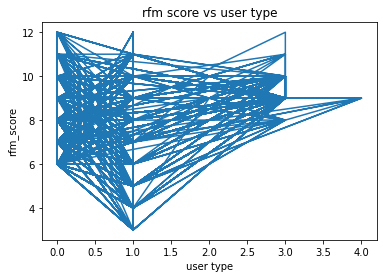

In [34]:
fig1 = plt.figure()

rfm_score = rfm_model["RFM_Score"]
user_type = rfm_model["User_Type"]

plt.plot(user_type, rfm_score)
plt.title("rfm score vs user type")
plt.xlabel("user type")
plt.ylabel("rfm_score")
plt.show()